# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#Machine Learning algorithm
from sklearn.linear_model import LinearRegression

# For splitting dataset
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
# from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [ ]:
df = pd.read_csv('Wildfire data.csv')

In [ ]:
df.head()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,6/28/21 22:26,0.01,07-01-2021 13:26,10.00,NaN,NaN,07-01-2021 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,3/30/21 14:30,0.01,3/30/21 14:30,0.01,3/30/21 14:35,0.01,04-09-2021 08:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,4/16/21 16:57,0.10,4/16/21 16:57,0.10,NaN,NaN,4/17/21 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,4/17/21 15:20,0.01,4/17/21 15:20,0.01,NaN,NaN,4/17/21 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,04-01-2021 19:10,7.13,04-02-2021 11:00,7.13,04-02-2021 15:52,7.13,04-12-2021 14:30,7.13


# Preprocessing the data

In [ ]:
df.shape


(22914, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     22914 non-null  int64  
 1   fire_number                   22914 non-null  object 
 2   fire_name                     604 non-null    object 
 3   current_size                  22914 non-null  float64
 4   size_class                    22914 non-null  object 
 5   fire_location_latitude        22914 non-null  float64
 6   fire_location_longitude       22914 non-null  float64
 7   fire_origin                   22905 non-null  object 
 8   general_cause_desc            22914 non-null  object 
 9   industry_identifier_desc      408 non-null    object 
 10  responsible_group_desc        9031 non-null   object 
 11  activity_class                14204 non-null  object 
 12  true_cause                    12488 non-null  object 
 13  f

In [ ]:
# datatype of train dataset
df.dtypes

fire_year                         int64
fire_number                      object
fire_name                        object
current_size                    float64
size_class                       object
fire_location_latitude          float64
fire_location_longitude         float64
fire_origin                      object
general_cause_desc               object
industry_identifier_desc         object
responsible_group_desc           object
activity_class                   object
true_cause                       object
fire_start_date                  object
det_agent                        object
det_agent_type                   object
discovered_date                  object
discovered_size                 float64
reported_date                    object
dispatched_resource              object
dispatch_date                    object
start_for_fire_date              object
assessment_resource              object
assessment_datetime              object
assessment_hectares             float64


In [ ]:
df_copy = df.copy()
df.copy()

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,HWF053,NaN,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,...,NaN,NaN,6/28/21 22:26,0.01,07-01-2021 13:26,10.00,NaN,NaN,07-01-2021 13:44,5.50
1,2021,RWF005,NaN,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,NaN,...,NaN,NaN,3/30/21 14:30,0.01,3/30/21 14:30,0.01,3/30/21 14:35,0.01,04-09-2021 08:30,0.01
2,2021,LWF014,NaN,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,NaN,...,NaN,NaN,4/16/21 16:57,0.10,4/16/21 16:57,0.10,NaN,NaN,4/17/21 14:15,0.10
3,2021,MWF002,NaN,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,NaN,...,NaN,NaN,4/17/21 15:20,0.01,4/17/21 15:20,0.01,NaN,NaN,4/17/21 15:24,0.01
4,2021,EWF014,NaN,7.13,C,53.693450,-116.058633,Private Land,Resident,NaN,...,NaN,NaN,04-01-2021 19:10,7.13,04-02-2021 11:00,7.13,04-02-2021 15:52,7.13,04-12-2021 14:30,7.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22909,2006,CWF231,NaN,0.10,A,51.161883,-114.869317,Indian Reservation,Resident,NaN,...,NaN,NaN,03-11-2007 17:35,0.01,03-11-2007 17:45,0.01,NaN,NaN,03-11-2007 18:00,0.10
22910,2006,CWF232,NaN,0.01,A,51.084150,-115.392633,Provincial Park,Undetermined,NaN,...,NaN,NaN,3/19/07 10:25,0.01,3/19/07 10:25,0.01,NaN,NaN,3/19/07 10:40,0.01
22911,2006,CWF233,NaN,0.70,B,51.333900,-114.997667,Provincial Land,Recreation,NaN,...,NaN,NaN,3/26/07 2:00,0.70,3/26/07 2:00,0.70,NaN,NaN,3/26/07 12:00,0.70
22912,2006,CWF234,NaN,0.01,A,51.071467,-115.316300,Provincial Land,Resident,NaN,...,NaN,NaN,3/28/07 11:00,0.01,3/28/07 11:00,0.01,NaN,NaN,3/28/07 11:30,0.01


In [ ]:
# dropping the columns which have no role in the determination of fire size like fire_name, fire_number
df.drop(columns=['fire_number','fire_name','discovered_size','to_fs_date','to_hectares'],inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     22914 non-null  int64  
 1   current_size                  22914 non-null  float64
 2   size_class                    22914 non-null  object 
 3   fire_location_latitude        22914 non-null  float64
 4   fire_location_longitude       22914 non-null  float64
 5   fire_origin                   22905 non-null  object 
 6   general_cause_desc            22914 non-null  object 
 7   industry_identifier_desc      408 non-null    object 
 8   responsible_group_desc        9031 non-null   object 
 9   activity_class                14204 non-null  object 
 10  true_cause                    12488 non-null  object 
 11  fire_start_date               22294 non-null  object 
 12  det_agent                     22913 non-null  object 
 13  d

In [ ]:
# datatype of train dataset
df.dtypes

fire_year                         int64
current_size                    float64
size_class                       object
fire_location_latitude          float64
fire_location_longitude         float64
fire_origin                      object
general_cause_desc               object
industry_identifier_desc         object
responsible_group_desc           object
activity_class                   object
true_cause                       object
fire_start_date                  object
det_agent                        object
det_agent_type                   object
discovered_date                  object
reported_date                    object
dispatched_resource              object
dispatch_date                    object
start_for_fire_date              object
assessment_resource              object
assessment_datetime              object
assessment_hectares             float64
fire_spread_rate                float64
fire_type                        object
fire_position_on_slope           object


In [ ]:

df['general_cause_desc'] = np.where(df['industry_identifier_desc'].notnull(), df['industry_identifier_desc'], df['general_cause_desc'])
condition = df['responsible_group_desc'].notnull() & (df['responsible_group_desc'] != 'Others (explain in remarks)')
df['general_cause_desc'] = np.where(condition, df['responsible_group_desc'], df['general_cause_desc'])
df.drop(columns=['industry_identifier_desc','responsible_group_desc'],inplace=True)
df['activity_class'] = np.where(df['true_cause'].notnull(), df['true_cause'], df['activity_class'])
df.drop(columns=['true_cause'],inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     22914 non-null  int64  
 1   current_size                  22914 non-null  float64
 2   size_class                    22914 non-null  object 
 3   fire_location_latitude        22914 non-null  float64
 4   fire_location_longitude       22914 non-null  float64
 5   fire_origin                   22905 non-null  object 
 6   general_cause_desc            22914 non-null  object 
 7   activity_class                14206 non-null  object 
 8   fire_start_date               22294 non-null  object 
 9   det_agent                     22913 non-null  object 
 10  det_agent_type                22913 non-null  object 
 11  discovered_date               18936 non-null  object 
 12  reported_date                 22913 non-null  object 
 13  d

In [ ]:
# dropping the unecessary columns
df = df.dropna(subset=['start_for_fire_date'])
df = df.dropna(subset=['fire_start_date'])


In [ ]:
# Merging two columns to get the useful value and dropping the unecessary columns.
# calculating the difference in fire_start_date and reported_date using the 'pd.to_datetime' function
# Using errors= 'coerce' it will replace all non-numeric values with NaT

df['fire_start_date'] = pd.to_datetime(df['fire_start_date'],errors='coerce')
df['reported_date'] = pd.to_datetime(df['reported_date'],errors='coerce')
df['reporting_time'] = df['reported_date'] - df['fire_start_date']
df.drop(columns=['fire_start_date','discovered_date','reported_date'],inplace=True)

df['assessment_datetime'] = pd.to_datetime(df['assessment_datetime'],errors='coerce')
df['start_for_fire_date'] = pd.to_datetime(df['start_for_fire_date'],errors='coerce')
df['idk_time'] = df['assessment_datetime'] - df['start_for_fire_date']
df.drop(columns=['dispatch_date','start_for_fire_date','assessment_datetime'],inplace=True)
df.info()

C:\Users\Shubh\AppData\Local\Temp\ipykernel_33896\4089141769.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fire_start_date'] = pd.to_datetime(df['fire_start_date'],errors='coerce')
C:\Users\Shubh\AppData\Local\Temp\ipykernel_33896\4089141769.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reported_date'] = pd.to_datetime(df['reported_date'],errors='coerce')
C:\Users\Shubh\AppData\Local\Temp\ipykernel_33896\4089141769.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['assessment_datetime'] = pd.to_datetime(df['assessment_datetime'],errors='coerce')
C:

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   fire_year                     22293 non-null  int64          
 1   current_size                  22293 non-null  float64        
 2   size_class                    22293 non-null  object         
 3   fire_location_latitude        22293 non-null  float64        
 4   fire_location_longitude       22293 non-null  float64        
 5   fire_origin                   22284 non-null  object         
 6   general_cause_desc            22293 non-null  object         
 7   activity_class                13596 non-null  object         
 8   det_agent                     22292 non-null  object         
 9   det_agent_type                22292 non-null  object         
 10  dispatched_resource           22293 non-null  object         
 11  assessment_resource 

In [ ]:
df['uc_fs_date'] = pd.to_datetime(df['uc_fs_date'],errors='coerce')
df['ex_fs_date'] = pd.to_datetime(df['ex_fs_date'],errors='coerce')
df['ex_time'] = df['ex_fs_date'] - df['uc_fs_date']
df.drop(columns=['bh_fs_date','uc_fs_date','ex_fs_date'],inplace=True)

In [ ]:
# dropping unecessary columns
df.drop(inplace=True,columns=['ia_access','ia_arrival_at_fire_date','fire_fighting_start_date','bucketing_on_fire','first_bucket_drop_date'])

In [ ]:
float64_columns = df.select_dtypes(include=['float64']).columns

# Replace null values of the column with the mean value of the column
for col in float64_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   fire_year                     22293 non-null  int64          
 1   current_size                  22293 non-null  float64        
 2   size_class                    22293 non-null  object         
 3   fire_location_latitude        22293 non-null  float64        
 4   fire_location_longitude       22293 non-null  float64        
 5   fire_origin                   22284 non-null  object         
 6   general_cause_desc            22293 non-null  object         
 7   activity_class                13596 non-null  object         
 8   det_agent                     22292 non-null  object         
 9   det_agent_type                22292 non-null  object         
 10  dispatched_resource           22293 non-null  object         
 11  assessment_resource 

C:\Users\Shubh\AppData\Local\Temp\ipykernel_33896\38593812.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [ ]:
df.drop(inplace=True,columns=['fuel_type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   fire_year                     22293 non-null  int64          
 1   current_size                  22293 non-null  float64        
 2   size_class                    22293 non-null  object         
 3   fire_location_latitude        22293 non-null  float64        
 4   fire_location_longitude       22293 non-null  float64        
 5   fire_origin                   22284 non-null  object         
 6   general_cause_desc            22293 non-null  object         
 7   activity_class                13596 non-null  object         
 8   det_agent                     22292 non-null  object         
 9   det_agent_type                22292 non-null  object         
 10  dispatched_resource           22293 non-null  object         
 11  assessment_resource 

In [ ]:
# Lattitude----> (-90 to 90)
# Longitude----> (-180 to 180)

# We need to drop the rows having fire_location_lattitude and fire_location_longitude out of the above mentioned range

df[df['fire_location_latitude']<-90]
df[df['fire_location_latitude']>90]

,fire_year,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,activity_class,det_agent,det_agent_type,...,wind_speed,initial_action_by,fire_fighting_start_size,distance_from_water_source,bh_hectares,uc_hectares,ex_hectares,reporting_time,idk_time,ex_time


In [ ]:
# Dropping the invlid values of latitude
df = df.drop((df[df['fire_location_latitude']<-90]).index, axis=0)
df = df.drop((df[df['fire_location_latitude']>90]).index, axis=0)

In [ ]:
df['fire_location_latitude'].sort_values(ascending=False)

6344     59.999510
11170    59.999000
19957    59.998333
18767    59.996117
6591     59.994717
           ...    
6690     49.225083
22659    49.213367
16287    49.066883
16277    49.056267
1690     48.998195
Name: fire_location_latitude, Length: 22293, dtype: float64

In [ ]:
df = df.drop((df[df['fire_location_longitude']<-180]).index, axis=0)
df = df.drop((df[df['fire_location_longitude']>180]).index, axis=0)
df['fire_location_longitude'].sort_values(ascending=False)

17109   -110.000917
3810    -110.006750
15648   -110.006883
15567   -110.016667
9811    -110.018117
            ...    
17958   -119.997799
82      -119.997799
11010   -119.998067
18956   -119.998100
9830    -119.999983
Name: fire_location_longitude, Length: 22293, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   fire_year                     22293 non-null  int64          
 1   current_size                  22293 non-null  float64        
 2   size_class                    22293 non-null  object         
 3   fire_location_latitude        22293 non-null  float64        
 4   fire_location_longitude       22293 non-null  float64        
 5   fire_origin                   22284 non-null  object         
 6   general_cause_desc            22293 non-null  object         
 7   activity_class                13596 non-null  object         
 8   det_agent                     22292 non-null  object         
 9   det_agent_type                22292 non-null  object         
 10  dispatched_resource           22293 non-null  object         
 11  assessment_resource 

In [ ]:
df.isnull().sum()

fire_year                           0
current_size                        0
size_class                          0
fire_location_latitude              0
fire_location_longitude             0
fire_origin                         9
general_cause_desc                  0
activity_class                   8697
det_agent                           1
det_agent_type                      1
dispatched_resource                 0
assessment_resource                 0
assessment_hectares                 0
fire_spread_rate                    0
fire_type                        1996
fire_position_on_slope           2110
weather_conditions_over_fire     2116
temperature                         0
relative_humidity                   0
wind_direction                   2116
wind_speed                          0
initial_action_by                   1
fire_fighting_start_size            0
distance_from_water_source          0
bh_hectares                         0
uc_hectares                         0
ex_hectares 

In [ ]:
# As we have given fire_location_longitute and fire_location_latitude values.So,we need to calculate the distance using the haversine formula.
# Haversine formula is used to calculate distance between two points on a sphere (specified in decimal degrees))
# Second Lat and long are from alberta nearest to the water source as being near water sourse should reduce chances of forest fire
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=-114.149519
    lat2=54.602849

    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km


In [ ]:
df['distance'] = df[['fire_location_longitude','fire_location_latitude']].apply(haversine,axis=1)

C:\Users\Shubh\AppData\Local\Temp\ipykernel_33896\832642202.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1=a[0]
C:\Users\Shubh\AppData\Local\Temp\ipykernel_33896\832642202.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1=a[1]


In [ ]:
df.head()

,fire_year,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,activity_class,det_agent,det_agent_type,...,initial_action_by,fire_fighting_start_size,distance_from_water_source,bh_hectares,uc_hectares,ex_hectares,reporting_time,idk_time,ex_time,distance
0,2021,5.50,C,59.522139,-119.926971,Provincial Land,Lightning,NaN,UAA,UNP,...,HAC,5.500000,2.648829,0.01,10.00,5.50,4018 days 07:36:00,0 days 00:00:00,0 days 00:18:00,648.487976
1,2021,0.01,A,52.692262,-116.118960,Provincial Land,Forest Industry,Winter Burning,UIND,UNP,...,Other Agency,5.503257,2.648829,0.01,0.01,0.01,370 days 06:00:00,-1 days +23:58:00,NaT,248.943147
2,2021,0.10,A,55.937050,-110.719950,Indian Reservation,Incendiary,Arson,CP,LKT,...,FTAC,0.100000,2.648829,0.10,0.10,0.10,365 days 00:12:00,0 days 00:16:00,NaT,263.032994
3,2021,0.01,A,56.425933,-111.160750,Indian Reservation,Resident,Unsafe Fire,GOVT,UNP,...,Fire Department,5.503257,2.648829,0.01,0.01,0.01,365 days 21:05:00,0 days 00:50:00,NaT,276.539975
4,2021,7.13,C,53.693450,-116.058633,Private Land,Resident,Unsafe Fire,PUB,UNP,...,Fire Department,5.503257,2.648829,7.13,7.13,7.13,151 days 05:06:00,0 days 01:01:00,10 days 03:30:00,160.252556


In [ ]:
df.nunique()

fire_year                          16
current_size                     1323
size_class                          5
fire_location_latitude          20559
fire_location_longitude         20905
fire_origin                         7
general_cause_desc                 55
activity_class                     26
det_agent                         148
det_agent_type                      4
dispatched_resource                 7
assessment_resource                 4
assessment_hectares               218
fire_spread_rate                   57
fire_type                           5
fire_position_on_slope              5
weather_conditions_over_fire        5
temperature                       331
relative_humidity                 102
wind_direction                     11
wind_speed                         67
initial_action_by                  15
fire_fighting_start_size          306
distance_from_water_source         93
bh_hectares                       772
uc_hectares                      1071
ex_hectares 

In [ ]:
df.drop(columns=['fire_location_latitude','fire_location_longitude'],inplace=True)

In [ ]:
# Counter(df['distance'] <= 50)
# Counter(df['distance'] <= 100)

In [ ]:
df.head(50)

,fire_year,current_size,size_class,fire_origin,general_cause_desc,activity_class,det_agent,det_agent_type,dispatched_resource,assessment_resource,...,initial_action_by,fire_fighting_start_size,distance_from_water_source,bh_hectares,uc_hectares,ex_hectares,reporting_time,idk_time,ex_time,distance
0,2021,5.50,C,Provincial Land,Lightning,NaN,UAA,UNP,HAC,IA Forces,...,HAC,5.500000,2.648829,0.01,10.00,5.50,4018 days 07:36:00,0 days 00:00:00,0 days 00:18:00,648.487976
1,2021,0.01,A,Provincial Land,Forest Industry,Winter Burning,UIND,UNP,FPD Staff,Wildfire Assessor,...,Other Agency,5.503257,2.648829,0.01,0.01,0.01,370 days 06:00:00,-1 days +23:58:00,NaT,248.943147
2,2021,0.10,A,Indian Reservation,Incendiary,Arson,CP,LKT,FPD Staff,IA Forces,...,FTAC,0.100000,2.648829,0.10,0.10,0.10,365 days 00:12:00,0 days 00:16:00,NaT,263.032994
3,2021,0.01,A,Indian Reservation,Resident,Unsafe Fire,GOVT,UNP,HAC,IA Forces,...,Fire Department,5.503257,2.648829,0.01,0.01,0.01,365 days 21:05:00,0 days 00:50:00,NaT,276.539975
4,2021,7.13,C,Private Land,Resident,Unsafe Fire,PUB,UNP,FPD Staff,IA Forces,...,Fire Department,5.503257,2.648829,7.13,7.13,7.13,151 days 05:06:00,0 days 01:01:00,10 days 03:30:00,160.252556
5,2021,0.02,A,Private Land,Resident,Winter Burning,LFS,UNP,FPD Staff,IA Forces,...,Land Owner,5.503257,2.648829,0.01,0.01,0.02,186 days 04:40:00,0 days 00:03:00,NaT,211.907218
6,2021,0.10,A,Private Land,Resident,Winter Burning,PUB,UNP,FPD Staff,IA Forces,...,Land Owner,5.503257,2.648829,0.10,0.10,0.10,107 days 06:47:00,0 days 00:38:00,0 days 00:01:00,162.463312
7,2021,2.03,B,Private Land,Resident,Winter Burning,GOVT,UNP,FPD Staff,IA Forces,...,Fire Department,5.503257,2.648829,2.00,2.03,2.03,115 days 05:52:00,0 days 02:00:00,NaT,192.198445
8,2021,0.02,A,Provincial Land,Forest Industry,Winter Burning,310,UNP,FPD Staff,IA Forces,...,Industry,5.503257,2.648829,0.02,0.02,0.02,1 days 07:27:00,0 days 01:40:00,NaT,126.289280
9,2021,499.50,E,Provincial Land,Lightning,NaN,MY,LKT,HAC,IA Forces,...,HAC,0.500000,1.000000,499.50,499.50,499.50,217 days 00:34:00,0 days 00:17:00,NaT,171.020268


In [ ]:
timedelta_columns = df.select_dtypes(include=['timedelta64']).columns

# Extract timedelta features from timedelta columns
for col in timedelta_columns:
    df[col + '_days'] = df[col].dt.days
    df[col + '_seconds'] = df[col].dt.seconds
    df[col + '_days_total_seconds'] = df[col].dt.total_seconds()

# Drop initial timedelta columns inplace
df.drop(columns=timedelta_columns, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fire_year                          22293 non-null  int64  
 1   current_size                       22293 non-null  float64
 2   size_class                         22293 non-null  object 
 3   fire_origin                        22284 non-null  object 
 4   general_cause_desc                 22293 non-null  object 
 5   activity_class                     13596 non-null  object 
 6   det_agent                          22292 non-null  object 
 7   det_agent_type                     22292 non-null  object 
 8   dispatched_resource                22293 non-null  object 
 9   assessment_resource                22293 non-null  object 
 10  assessment_hectares                22293 non-null  float64
 11  fire_spread_rate                   22293 non-null  float64


In [ ]:
df2 =df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fire_year                          22293 non-null  int64  
 1   current_size                       22293 non-null  float64
 2   size_class                         22293 non-null  object 
 3   fire_origin                        22284 non-null  object 
 4   general_cause_desc                 22293 non-null  object 
 5   activity_class                     13596 non-null  object 
 6   det_agent                          22292 non-null  object 
 7   det_agent_type                     22292 non-null  object 
 8   dispatched_resource                22293 non-null  object 
 9   assessment_resource                22293 non-null  object 
 10  assessment_hectares                22293 non-null  float64
 11  fire_spread_rate                   22293 non-null  float64


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# label encoding the size_class values
size_class_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

# Initialize LabelEncoder with custom mapping
label_encoder = LabelEncoder()
label_encoder.fit(df['size_class'].map(size_class_mapping))

# Transform 'size_class' column using label encoding
df['size_class'] = label_encoder.transform(df['size_class'].map(size_class_mapping))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fire_year                          22293 non-null  int64  
 1   current_size                       22293 non-null  float64
 2   size_class                         22293 non-null  int64  
 3   fire_origin                        22284 non-null  object 
 4   general_cause_desc                 22293 non-null  object 
 5   activity_class                     13596 non-null  object 
 6   det_agent                          22292 non-null  object 
 7   det_agent_type                     22292 non-null  object 
 8   dispatched_resource                22293 non-null  object 
 9   assessment_resource                22293 non-null  object 
 10  assessment_hectares                22293 non-null  float64
 11  fire_spread_rate                   22293 non-null  float64


In [ ]:
# reducing the dimensionality of the data set by Z-scoring
data = df.select_dtypes(include=['float64','int32']).columns
mean = np.mean(df[data],axis=0,)
sd = np.std(df[data],axis=0)
df[data] = (df[data] - mean)/sd

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values in each object column
unique_counts = df[object_columns].nunique()
unique_counts

fire_origin                       7
general_cause_desc               55
activity_class                   26
det_agent                       148
det_agent_type                    4
dispatched_resource               7
assessment_resource               4
fire_type                         5
fire_position_on_slope            5
weather_conditions_over_fire      5
wind_direction                   11
initial_action_by                15
dtype: int64

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder_det_agent = LabelEncoder()
df['det_agent_encoded'] = label_encoder_det_agent.fit_transform(df['det_agent'])

label_encoder_cause = LabelEncoder()
df['general_cause_encoded'] = label_encoder_cause.fit_transform(df['general_cause_desc'])

label_encoder_activity = LabelEncoder()
df['activity_class_encoded'] = label_encoder_activity.fit_transform(df['activity_class'])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
df_pca = pca.fit_transform(df[['det_agent_encoded', 'general_cause_encoded', 'activity_class_encoded']])

# Apply K-means clustering for 'det_agent'
kmeans_det_agent = KMeans(n_clusters=15, random_state=42)
df['det_agent_cluster'] = kmeans_det_agent.fit_predict(df[['det_agent_encoded']])

# Apply K-means clustering for 'general_cause_desc'
kmeans_cause = KMeans(n_clusters=5, random_state=42)
df['cause_cluster'] = kmeans_cause.fit_predict(df[['general_cause_encoded']])

# Apply K-means clustering for 'activity_class'
kmeans_activity = KMeans(n_clusters=3, random_state=42)
df['activity_cluster'] = kmeans_activity.fit_predict(df[['activity_class_encoded']])

# Drop initial categorical columns and encoded columns
df.drop(['det_agent', 'general_cause_desc', 'activity_class',
         'det_agent_encoded', 'general_cause_encoded', 'activity_class_encoded'], axis=1, inplace=True)

print("DataFrame with cluster labels only:")
df.nunique()

DataFrame with cluster labels only:


fire_year                               16
current_size                          1323
size_class                               5
fire_origin                              7
det_agent_type                           4
dispatched_resource                      7
assessment_resource                      4
assessment_hectares                    218
fire_spread_rate                        57
fire_type                                5
fire_position_on_slope                   5
weather_conditions_over_fire             5
temperature                            331
relative_humidity                      102
wind_direction                          11
wind_speed                              67
initial_action_by                       15
fire_fighting_start_size               306
distance_from_water_source              93
bh_hectares                            772
uc_hectares                           1071
ex_hectares                           1323
distance                             22002
reporting_t

In [ ]:
# Encode the categorical columns
label_encoder_wind_direction = LabelEncoder()
df['wind_direction_encoded'] = label_encoder_wind_direction.fit_transform(df['wind_direction'])

label_encoder_action_by = LabelEncoder()
df['initial_action_by_encoded'] = label_encoder_action_by.fit_transform(df['initial_action_by'])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
df_pca = pca.fit_transform(df[['wind_direction_encoded', 'initial_action_by_encoded']])

# Apply K-means clustering for 'wind_direction'
kmeans_wind_direction = KMeans(n_clusters=3, random_state=42)
df['wind_direction_cluster'] = kmeans_wind_direction.fit_predict(df[['wind_direction_encoded']])

# Apply K-means clustering for 'initial_action_by'
kmeans_action_by = KMeans(n_clusters=3, random_state=42)
df['action_by_cluster'] = kmeans_action_by.fit_predict(df[['initial_action_by_encoded']])

# Drop initial categorical columns and encoded columns
df.drop(['wind_direction', 'initial_action_by', 'wind_direction_encoded', 'initial_action_by_encoded'], axis=1, inplace=True)


In [ ]:
non_obj_cols = df.select_dtypes(exclude=['object']).columns


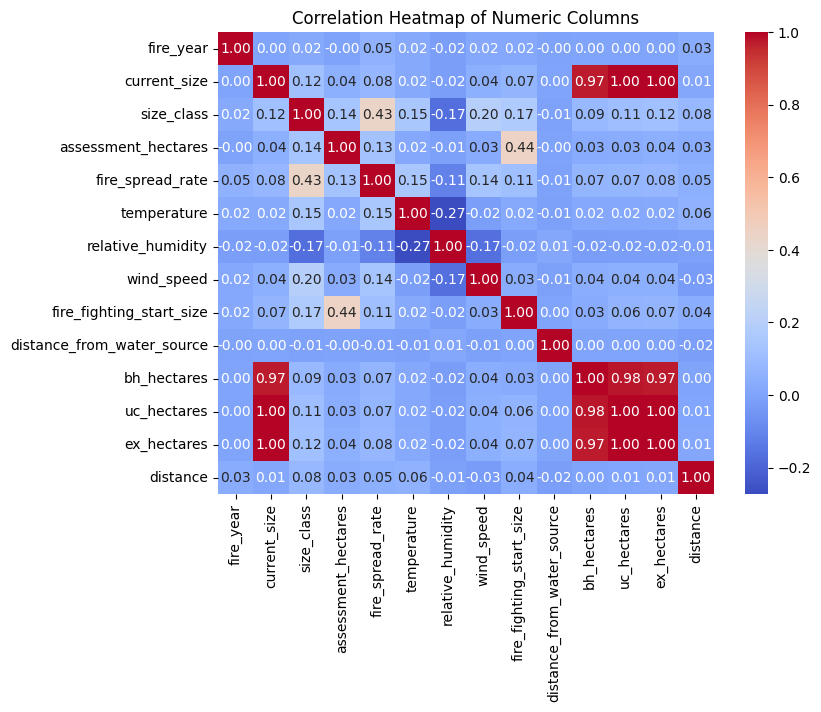

In [ ]:
numeric_cols = ['fire_year', 'current_size', 'size_class', 'assessment_hectares',
       'fire_spread_rate', 'temperature', 'relative_humidity', 'wind_speed',
       'fire_fighting_start_size', 'distance_from_water_source', 'bh_hectares',
       'uc_hectares', 'ex_hectares', 'distance']

# Create the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

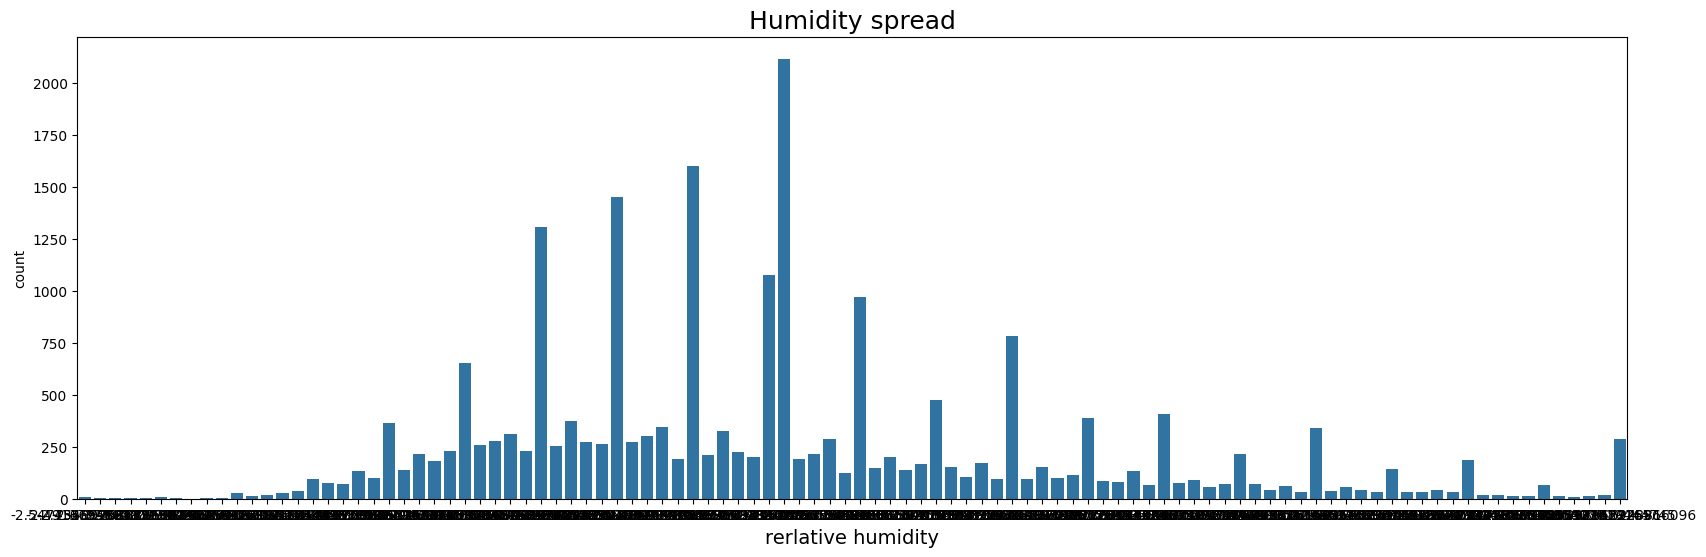

In [ ]:
# Analyzing the Correlation matrix and plot the features which effect the burn size
plt.figure(figsize= (20,6))
sns.countplot(x="relative_humidity", data=df)
plt.title('Humidity spread', size=18)
plt.xlabel('rerlative humidity',size=14)
plt.show()

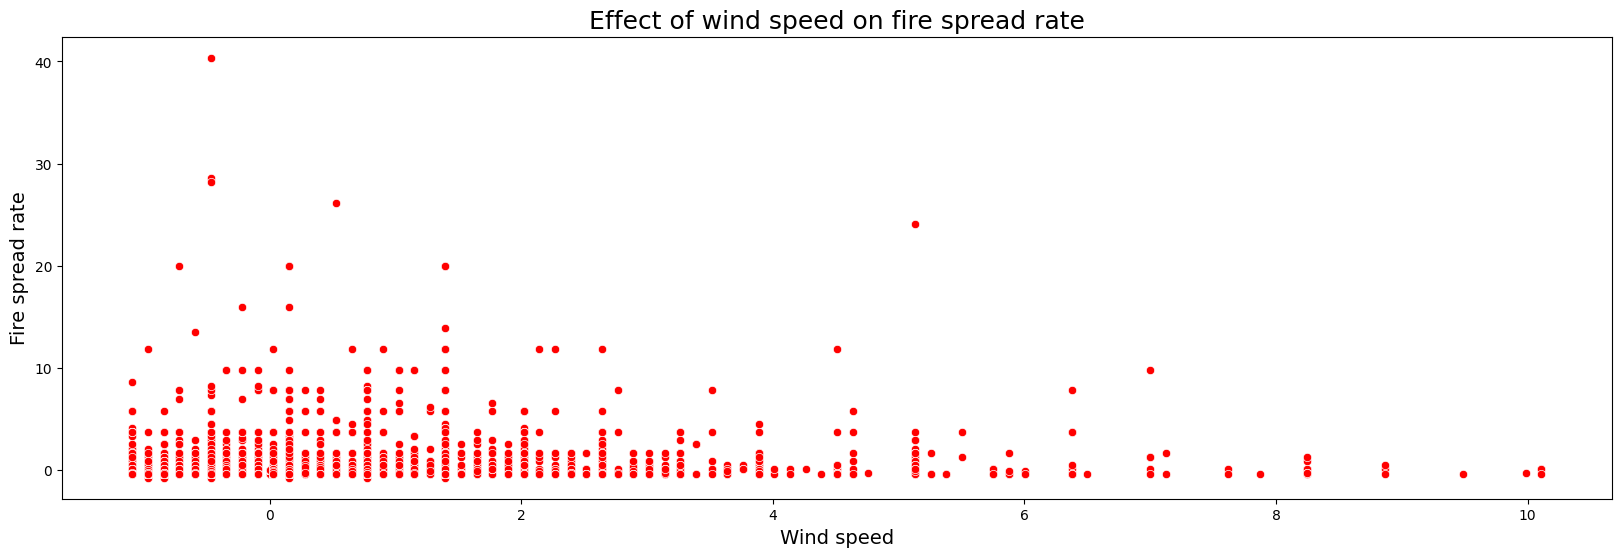

In [ ]:
plt.figure(figsize = (20,6))
sns.scatterplot(x='wind_speed',y='fire_spread_rate',color='r',data=df)
plt.title('Effect of wind speed on fire spread rate',size =18)
plt.xlabel('Wind speed',size=14)
plt.ylabel('Fire spread rate',size=14)
plt.show()

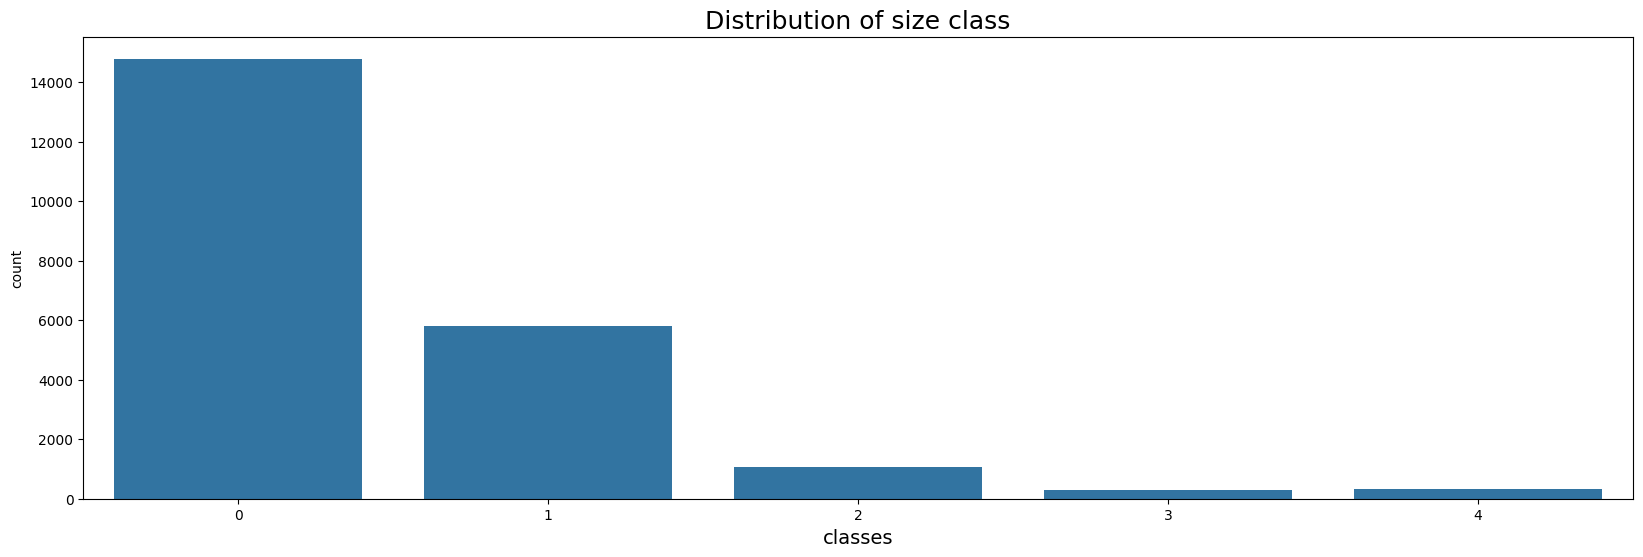

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x= "size_class", data=df)
plt.title('Distribution of size class',size=18)
plt.xlabel('classes',size=14)
plt.show()

In [ ]:
new=df_copy['general_cause_desc'].value_counts().reset_index()

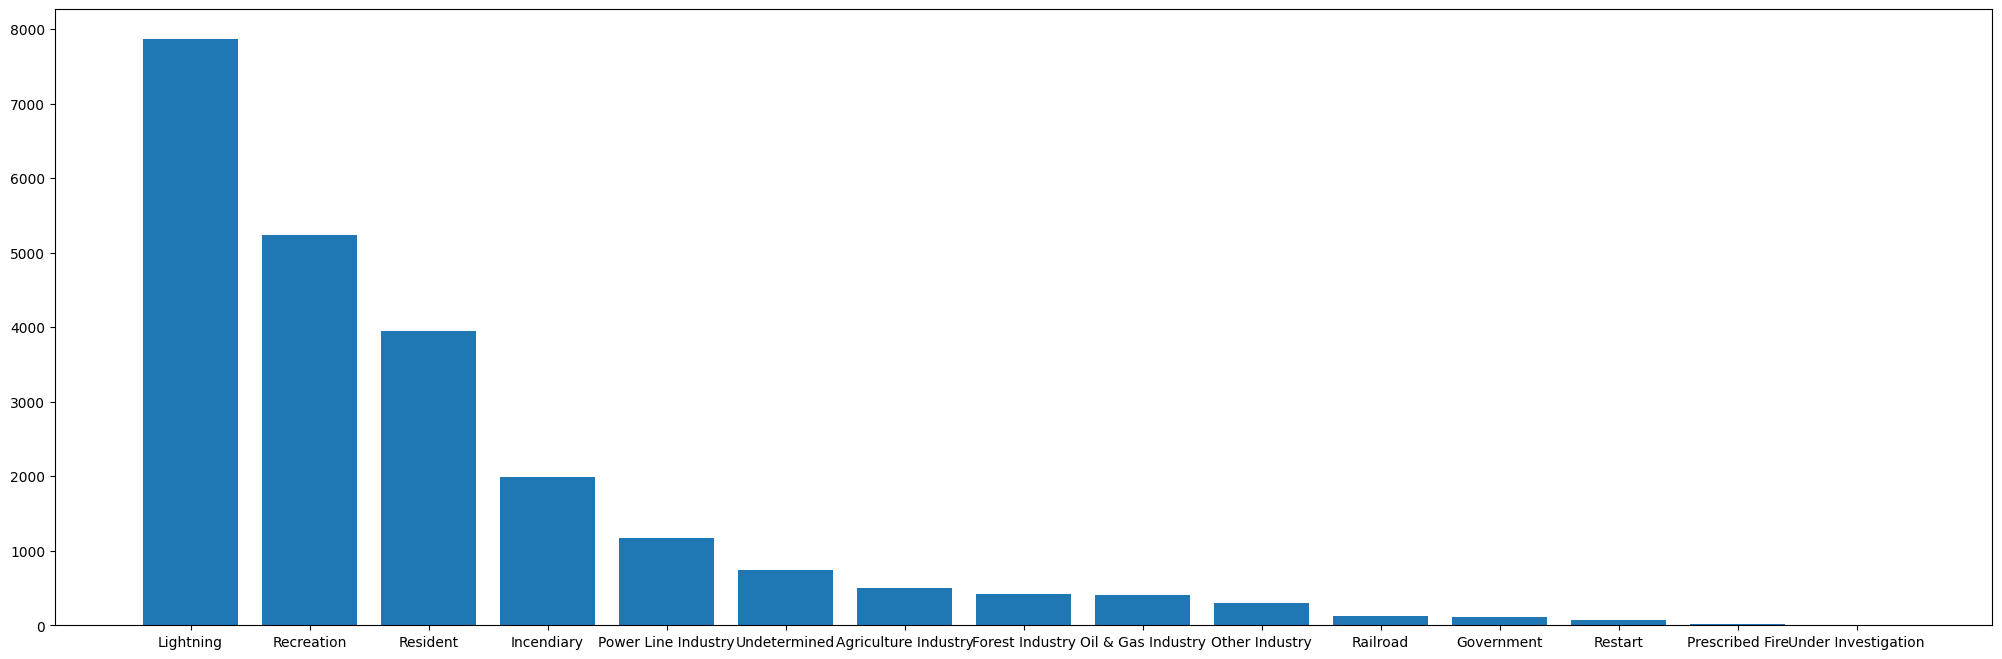

In [ ]:
plt.figure(figsize=(25,8))
plt.bar(new['general_cause_desc'],new['count'])
plt.show()

In [ ]:
df['current_size'].sort_values(ascending=False)

13380    103.998277
5893      87.336437
2451      40.103158
12218     24.213693
13471     15.759956
            ...    
10689     -0.025995
10694     -0.025995
10695     -0.025995
10696     -0.025995
22912     -0.025995
Name: current_size, Length: 22293, dtype: float64

In [ ]:
# Perform one-hot encoding on all columns with object dtype
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22293 entries, 0 to 22912
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   fire_year                                 22293 non-null  int64  
 1   current_size                              22293 non-null  float64
 2   size_class                                22293 non-null  int64  
 3   assessment_hectares                       22293 non-null  float64
 4   fire_spread_rate                          22293 non-null  float64
 5   temperature                               22293 non-null  float64
 6   relative_humidity                         22293 non-null  float64
 7   wind_speed                                22293 non-null  float64
 8   fire_fighting_start_size                  22293 non-null  float64
 9   distance_from_water_source                22293 non-null  float64
 10  bh_hectares                            

In [ ]:
df = df_encoded
df1= df.copy()

In [ ]:
df.dropna(inplace=True)

In [ ]:
# train test split for further modelling

x_train, x_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'current_size'],
                         df.iloc[:, 0], test_size = 0.20, random_state = 1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6166 entries, 18663 to 14980
Data columns (total 64 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   fire_year                                 6166 non-null   int64  
 1   size_class                                6166 non-null   int64  
 2   assessment_hectares                       6166 non-null   float64
 3   fire_spread_rate                          6166 non-null   float64
 4   temperature                               6166 non-null   float64
 5   relative_humidity                         6166 non-null   float64
 6   wind_speed                                6166 non-null   float64
 7   fire_fighting_start_size                  6166 non-null   float64
 8   distance_from_water_source                6166 non-null   float64
 9   bh_hectares                               6166 non-null   float64
 10  uc_hectares                         

In [ ]:
print(x_train.shape)
print(y_test.shape)

(6166, 64)
(1542,)


## LINEAR REGRESSION MODEL

In [ ]:
# Building model on top of training dataset

# model = LinearRegression().fit(x_train , y_train)

In [ ]:
# Prediction on train data

# pred_train_LR = model.predict(x_train)

In [ ]:
# Prediction on test data

# pred_test_LR= model.predict(x_test)

In [ ]:
# RMSE for train data

# RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [ ]:
# RMSE for test data

# RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [ ]:
# print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
# print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))

Root Mean Squared Error for Train data = 3.1338087841433674e-13
Root Mean Squared Error for Test data = 6.891691299778748e-05


In [ ]:
# Calculate R_square for train data

# from sklearn.metrics import r2_score

# r2_score(y_train, pred_train_LR)

1.0

In [ ]:
# r2_score(y_test, pred_test_LR)

0.9999999997584326

## DECISION TREE MODEL

In [ ]:
DT_MODEL = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [ ]:
# Prediction on train data

pred_train_DT = DT_MODEL.predict(x_train)



# Prediction on test data

pred_test_DT = DT_MODEL.predict(x_test)

In [ ]:
# Calculating RMSE for train data

RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))



# Calculating RMSE for test data

RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [ ]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_DT))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_DT))

Root Mean Squared Error for Train data = 1.1280052916505094
Root Mean Squared Error for Test data = 1.115326147271815


In [ ]:
# R_square calculation for train data

r2_score(y_train, pred_train_DT)

0.9396749056481981

In [ ]:
# R_square calculation for test data

r2_score(y_test, pred_test_DT)

0.9367310603498255

In [ ]:
df_copy_sort = df_copy.sort_values(by='current_size',ascending=False)
df_copy_sort

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
13380,2011,MWF007,Richardson Fire,577646.80,E,57.603559,-111.301272,Provincial Land,Undetermined,NaN,...,10.0,5/14/11 17:45,6/20/11 8:10,602417.00,8/15/11 14:24,707648.00,NaN,NaN,01-04-2012 11:57,577646.80
5893,2016,MWF009,Horse River Fire,485123.60,E,56.670117,-111.464233,Provincial Land,Under Investigation,NaN,...,NaN,NaN,6/13/16 8:49,589617.00,07-04-2016 09:30,589552.00,NaN,NaN,08-02-2017 17:55,485123.60
3065,2019,HWF042,Chuckegg Creek Fire,334772.60,E,58.287567,-117.279655,Provincial Land,Lightning,NaN,...,NaN,NaN,5/13/19 8:55,271.00,8/18/19 12:00,350134.89,NaN,NaN,10/13/20 13:00,334772.60
2451,2019,SWF049,McMillan Complex,222837.20,E,55.716367,-114.406350,Provincial Land,Incendiary,NaN,...,0.6,5/18/19 15:05,6/21/19 16:00,273045.00,07-01-2019 20:00,273045.00,NaN,NaN,10/19/20 10:48,222837.20
12218,2012,HWF106,Zama Complex,134603.00,E,59.356333,-118.954594,Provincial Land,Lightning,NaN,...,1.0,6/22/12 13:33,6/28/12 11:20,3685.00,10/29/12 14:51,134603.00,NaN,NaN,06-10-2013 14:49,134603.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13366,2011,LWF111,NaN,0.01,A,55.926217,-110.696617,Indian Reservation,Resident,NaN,...,NaN,NaN,05-08-2011 14:44,0.01,05-09-2011 13:00,0.01,NaN,NaN,05-09-2011 13:15,0.01
13367,2011,LWF112,NaN,0.01,A,55.959900,-110.705550,Indian Reservation,Resident,NaN,...,NaN,NaN,05-08-2011 16:35,0.01,05-08-2011 17:09,0.01,NaN,NaN,05-08-2011 17:20,0.01
13368,2011,LWF113,NaN,0.01,A,55.959900,-110.705550,Indian Reservation,Recreation,NaN,...,NaN,NaN,05-08-2011 17:43,0.01,05-08-2011 17:43,0.01,NaN,NaN,05-08-2011 18:20,0.01
4601,2017,CWF037,NaN,0.01,A,51.269350,-115.020000,Provincial Land,Recreation,NaN,...,NaN,NaN,5/21/17 19:00,0.01,5/21/17 19:00,0.01,NaN,NaN,5/21/17 19:10,0.01


In [ ]:
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Define the coordinates
latitude = 57.603559
longitude = -111.301272

# Get the location
location = geolocator.reverse((latitude, longitude), exactly_one=True)

# Extract the address
address = location.raw['address']

# Print the address
print(address)

{'county': 'Division No. 16', 'state': 'Alberta', 'ISO3166-2-lvl4': 'CA-AB', 'country': 'Canada', 'country_code': 'ca'}


In [ ]:
# from pypostal.parser import parse

# # Define the postal code
# postal_code = 'CA-AB'

# # Parse the postal code
# parsed_postal_code = parse(postal_code)

# # Extract the FSA region
# fsa_region = parsed_postal_code['fsa']

# # Print the FSA region
# print(fsa_region)